We begin by defining a function, `basic_eigenpicture`, which, when given a $2 \times 2$ matrix $A$ as its input will return a plot, using Sage's inbuilt plotting functionality, of 30 unit vectors $\vec{v_{i}}$, $||\vec{v_{i}}|| = 1$, $\forall i \in [1,30]$. Each of these unit vectors will be centered at the origin, spaced apart by an angle of $\frac{2\pi}{30}$ radians, courtesy of the use of a rotation matrix $\begin{pmatrix}\cos(\theta) & -\sin(\theta)\\ \sin(\theta) & \cos(\theta)\end{pmatrix}$, applied to $\begin{pmatrix}1\\0\end{pmatrix}$ thirty times with a list comprehension. 

In addition to these vectors, the plot will contain thirty vectors $A\vec{v_{i}}$, the result of applying the matrix $A$ to the vectors $\vec{v_{i}}$ via left multiplication, once again generated using a list comprehension. Each of these vectors will be translated from the origin by $\vec{v_{i}}$.

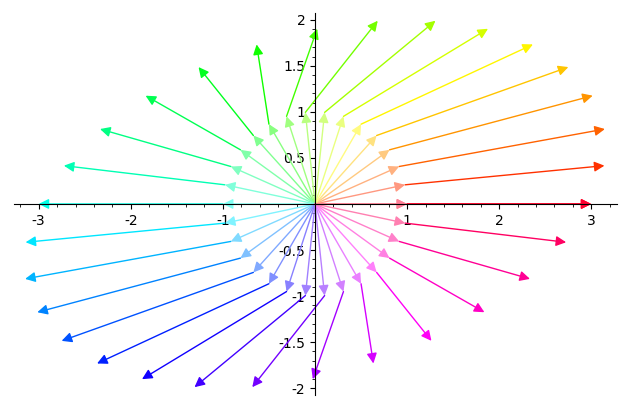

In [1]:
def basic_eigenpicture(A):
    V = [(Matrix([[cos(theta), -sin(theta)], [sin(theta), cos(theta)]])*vector([1,0])) for theta in [0..2*pi, step = 2*pi/30]] 
    P1 = sum([arrow((0,0), (V[i]), aspect_ratio=1, width = 1, arrowsize=3, color = Color(rainbow(len(V))[i]).lighter(0.5)) for i in [0..len(V)-1]])
    P2 = sum([arrow((V[i]), ((A*V[i]) + V[i]), aspect_ratio=1, width=1, arrowsize=3, color=rainbow(len(V))[i]) for i in [0..len(V)-1]])
    return P1 + P2

basic_eigenpicture(Matrix([[2,1],[0,1]]))

Having defined `basic_eigenpicture`, we now wish to develop functions which will provide further insight into the structure of the matrix $A$, specifically with reference to its eigenvectors. To develop this picture, once again relying upon the plotting functionality of Sage, we define a function `show_eigenvectors` which, when given an inputted matrix $A \in Mat(2;\mathbb{R})$, will return a plot of its eigenvectors $\vec{\xi_{i}}$, normalised such that $||x_{i}|| = 1$, $\forall i \in \{1,2\}$. We are only interesting in plotting the real eigenvectors, so we implement an if statement which verifies that $\lambda_{i}$, the eigenvalues corresponding to the $\vec{\xi_{i}}$, are real-valued.

In addition to the unit-length eigenvectors, we plot $A\vec{\xi_{i}}$, the matrix $A$ applied through left multiplication to $\vec{\xi_{i}}$. As the $\vec{\xi_{i}}$ are eigenvectors of $A$, we note that $A\vec{\xi_{i}} = \lambda_{i}\vec{\xi_{i}}$, so these vectors should be parallel to $\vec{\xi_{i}}$, and be of length $\lambda_{i}$. Once more, we translate these vectors by $\vec{\xi_{i}}$.

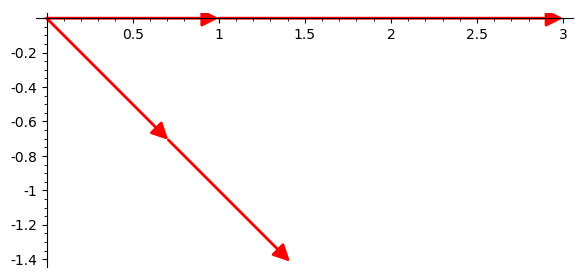

In [2]:
def show_eigenvectors(A):
    V1 = []
    if (A.eigenvectors_right()[0][2] == 1):
        V_eigval = [(A.eigenvectors_right()[i][0]) for i in [0..A.nrows()-1]]
        for i in range(len(V_eigval)):
            if V_eigval[i] in RR: #We are only considering real eigenvectors, and ergo real eigenvalues
                V1.append(A.eigenvectors_right()[i][1][0])
    else:
        if(len(A.eigenvectors_right()[0][1]) == 2):
            for i in range(2):
                V1.append(A.eigenvectors_right()[0][1][i])
        else:
            V_eigval = [A.eigenvectors_right()[0][0]]
            if V_eigval[0] in RR:
                V1.append(A.eigenvectors_right()[0][1][0])
    norm_V1 = [(1/sqrt(V1[i][0]^2 + V1[i][1]^2))*(V1[i]) for i in [0..len(V1) - 1]]
    P1 = sum([arrow((0,0), (norm_V1[i]), color=(1,0,0), aspect_ratio=1) for i in [0..len(norm_V1)-1]])
    P2 = sum([arrow((norm_V1[i]), ((A*norm_V1[i]) + norm_V1[i]), color=(1,0,0), aspect_ratio=1) for i in [0..len(norm_V1)-1]])
    return P1 + P2

show_eigenvectors(Matrix([[2,1],[0,1]]))
#This needs to have if statements added in amendments to verify that eigenvectors are real

Next, we wish to consider the singlar value decomposition, or SVD, of the matrix $A$. This will be two vectors of the form $A\vec{v}$, where $\vec{v}$ is a unit vector as defined above, which have the largest and smallest magnitude respectively. Ergo, where $S:= \{\vec{v} \in \mathbb{R}^{2}: ||\vec{v}|| = 1\}$, we wish to determine the vectors $\vec{s_{1}} = \min\limits_{\vec{v} \in S}||A\vec{v}||$, and $\vec{s_{2}} = \max\limits_{\vec{v} \in S}||A\vec{v}||$. These vectors correspond to the eigenvectors of the matrix $A^{T}A$, and will be of magnitude $\sqrt{|\lambda_{s_{i}}|}$, where $\lambda_{s_{i}}$ are the eigenvalues of $A^{T}A$.

And thus, to determine these singular vectors, we write a function `show_svd` which, given a matrix $A$, will determine the real eigenvectors $\vec{s_{1}}$, $\vec{s_{2}}$ of $A^{T}A$ (which are precisely the singular vectors of the matrix), and plot them, in addition to $A\vec{s_{1}}$, $A\vec{s_{2}}$, both translated as prior by the unit vectors.

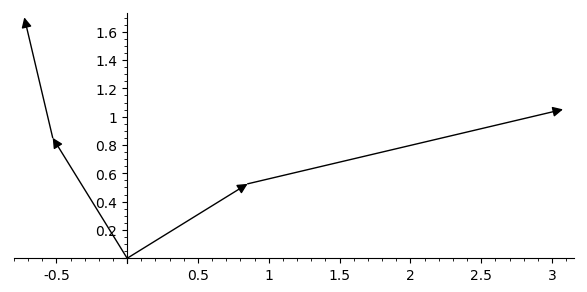

In [3]:
def show_svd(A):
    B = A.change_ring(RDF)
    Mat = B.transpose()*B
    V1 = []
    if (Mat.eigenvectors_right()[0][2] == 1):
        V_eigval = [(Mat.eigenvectors_right()[i][0]) for i in [0..A.nrows()-1]]
    else:
        if(len(Mat.eigenvectors_right()[0][1]) == 2):
            for i in range(2):
                V1.append(Mat.eigenvectors_right()[i][1][0])
        else:
            V_eigval = [Mat.eigenvectors_right()[0][0]]
    for i in range(len(V_eigval)):
        if V_eigval[i] in RR: #We are only considering real eigenvectors, and ergo real eigenvalues
            V1.append(Mat.eigenvectors_right()[i][1][0])
            if V1[i][1] <=0:
                V1[i] *= -1
        else:
            return()
    norm_V1 = [(1/sqrt(V1[i][0]^2 + V1[i][1]^2))*(V1[i]) for i in [0..len(V1) - 1]]
    P1 = sum([arrow((0,0), (norm_V1[i]), color=(0,0,0), aspect_ratio=1, width=1, arrowsize=3) for i in [0..len(norm_V1)-1]])
    P2 = sum([arrow((norm_V1[i]), ((A*norm_V1[i]) + norm_V1[i]), aspect_ratio=1, width=1, arrowsize=3, color=(0,0,0)) for i in [0..len(norm_V1)-1]])
    return P1 + P2

show_svd(Matrix([[2,1],[0,1]]))

Now, having equipped ourselves with the tools to built a considerably more thorough and informative eigenpicture of a matrix $A$, we write a function `eigenpicture` which combines our previous functions into one plot, adding (optionally) `show_eigenvectors` and `show_svd` to the graph generated by `basic_eigenpicture`.

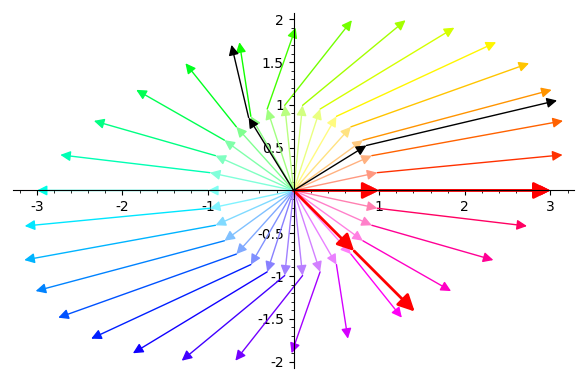

In [4]:
def eigenpicture(A, show_evecs = True, showsvd=True):
    P = basic_eigenpicture(A)
    if show_evecs:
        P += show_eigenvectors(A)
    if showsvd:
        P += show_svd(A)
    return P

eigenpicture(Matrix([[2,1],[0,1]]))

The complete picture gives us some clear insight into the structure of the matrix $A$. For instance, one can instantly deduce whether $A$ is invertible courtesy of `show_eigenvectors`. This is because, any invertible real matrix will have a full complement of eigenvectors, so a $2 \times 2$ matrix must have two eigenvectors if it is invertible. As such, any eigenpicture which contains only one eigenvector, corresponding to only one eigenvalue, is non-diagonalisable.

If the matrix $A$ is diagonal, then the eigenvectors produced by `show_eigenvectors` and the singular vectors produced by `show_svd` will be the same, up to a multiple of $-1$. This is because $A$ being diagonal implies that $A^{T} = A$, so the singular vectors are the eigenvectors of $A^{2}$, of length $\sqrt{|\lambda_{i}|}$, which will precisely be the eigenvectors of $A$.

Now, in order to verify that our `eigenfunction` function is operating as anticipated, we will run a variety of tests on it to ensure that the eigenpictures generated are as anticipated. Perhaps the most basic test we can conduct is to determine the length of time the function will take to generate an eigenpicture for a variety of randomly generated matrices. We will do so with a function `time_test` which will conduct $n$ time trials and return the mean time taken, using the `time` package, which counts the number of seconds since the Unix epoch, to do so. In order to avoid overburdening the kernel, we do this time test over the integer ring, meaning that $A_{ij} \in \mathbb{Z}$, $\forall i,j \in \{1,2\}$.

In [5]:
import time as time

def time_test(n):
    times_array = []
    for i in range(n):
        dummy_var = 0
        A = random_matrix(ZZ, 2, 2)
        t1 = time.time()
        dummy_var = eigenpicture(A)
        times_array.append(time.time() - t1)
    return (sum(times_array)/n)

n=10
time_mean = time_test(n)
print("The mean time taken to generate an eigenpicture, given " + str(n) + " trials is " + str(time_mean) + " seconds.")

The mean time taken to generate an eigenpicture, given 10 trials is 0.104815077782 seconds.


We additionally wish to consider the shape of the underlying set of vectors $\vec{v_{i}}$ and $A\vec{v_{i}}$ (that is, those generated by `basic_eigenpicture`), and determine why it, irrespective of our choice of a matrix, they appear to be elliptical - we must determine if this is always the case; if so, why? If not, under what circumstances is it?

We note that the vectors $A\vec{v_{i}}$, once translated by $\vec{v_{i}}$, will take the form:

$$(A\vec{v_{i}} + \vec{v_{i}}) = \begin{pmatrix}a_{11}\cos(\theta) + a_{12}\sin(\theta) + \cos(\theta)\\a_{21}\cos(\theta) + a_{22}\sin(\theta) + \sin(\theta)\end{pmatrix}$$for $\theta \in [0, 2\pi)$. To demonstrate that this is indeed the case, consider the following code:

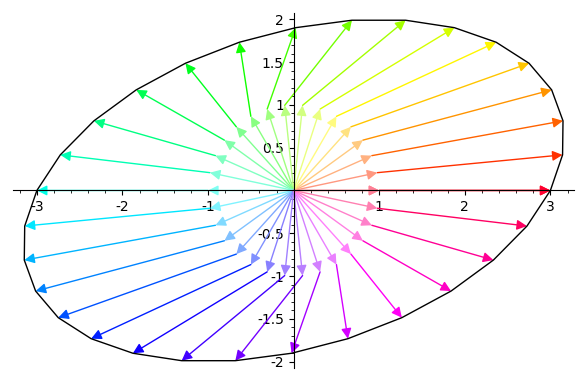

In [6]:
def ellipse_vector(A, theta): #We define a function which will return the vector defined above at various theta values
    return [(A[0][0]+1)*cos(theta) + A[0][1]*sin(theta), A[1][0]*cos(theta) + (A[1][1]+1)*sin(theta)]

A = Matrix(ZZ, [[2,1],[0,1]]) #We once more return to our sample matrix [[2,1],[0,1]]
vec = [ellipse_vector(A, theta) for theta in [0..2*pi, step=2*pi/30]] #and generate a list of the vectors

P1 = list_plot(vec, plotjoined=True, color=(0,0,0)) #We plot a path connecting the endpoints of the vectors in "vec"
P2 = basic_eigenpicture(A) #And overlay the basic_eigenpicture of the matrix A
P1 + P2

And thus, our problem has been reduced to determining when, for $\theta \in [0, 2\pi)$, $\begin{pmatrix}(a_{11} + 1)\cos(\theta) + a_{12}\sin(\theta)\\a_{21}\cos(\theta) + (a_{22} + 1)\sin(\theta)\end{pmatrix}$ defines an ellipse. We know that, when an ellipse is aligned horizontally and centered at $(h, k)$, it takes the form $\frac{(x - h)^{2}}{a^{2}} + \frac{(x - k)^{2}}{b^{2}} = 1$. Parameterising, and noting that in our case, as we are dealing with vectors $A\vec{v_{i}} + \vec{v_{i}}$, the ellipse will always be centered at the origin, for horizontally aligned ellipses we have $x = a\cos{\theta}, y = b\sin(\theta)$, as $\frac{(a\cos(\theta))^{2}}{a^{2}} + \frac{(b\sin(\theta))^{2}}{b^{2}} = 1$. However, as the formula for $(A\vec{v_{i}} + \vec{v_{i}})$ contains a mixture of terms involving $\cos(\theta)$ and $\sin(\theta)$, it will not necessarily represent a horizontally aligned object.

In order to represent the ellipse when it is rotated by an angle $\gamma$, we apply a rotation matrix and redefine our parameterisation such that $x = a\cos(\theta)\cos(\gamma) - b\sin(\theta)\sin(\gamma)$, $y = a\cos(\theta)\sin(\gamma) + b\sin(\theta)\cos(\gamma)$. Fitting this to our vector $(A\vec{v_{i}} + \vec{v_{i}})$, we have

$$\begin{pmatrix}(a\cos(\gamma))\cos(\theta) + (-b\sin(\gamma))\sin(\theta)\\(a\sin(\gamma))\cos(\theta) + (b\cos(\gamma))\sin(\theta)\end{pmatrix}$$which implies that $$A = \begin{pmatrix}a\cos(\gamma) & -b\sin(\gamma)\\a\sin(\gamma) & b\cos(\gamma)\end{pmatrix}$$
Consequently, $(A\vec{v_{i}} + \vec{v_{i}})$ describes an ellipse if the inputted matrix $A$ is of this form for some $a, b, \gamma$.

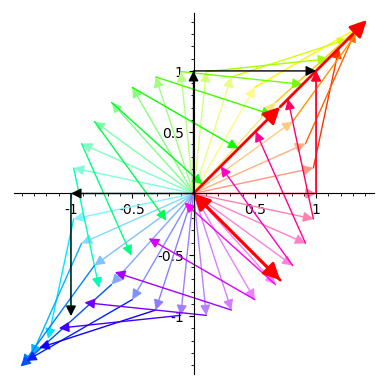

In [17]:
A = Matrix(ZZ, [[0,1],[1,0]]) #Is this elliptical?
B = Matrix(ZZ, [[2,1],[-1,1]]) #This has no real eigenvalues or eigenvectors
eigenpicture(A) 

We additionally wish to ponder <i>why</i> determining the eigenvectors of $A^{T}A$ will provide us with the singular value decomposition of a given $2 \times 2$ matrix. Poole's "Linear Algebra" gives some insight into doing so, and we can certainly fill a slide or two, in addition to several markdown boxes, elaborating on why this is the case.

In order to investigate the eigenvalues and related properties of various matrices, we use our `eigenpicture` function to generate a graph for various $2 \times 2$ matrices $A_{i}$, and compare and contrast them to see what we can deduce for matrices which have different properties.

The eigenpicture generated by the matrix is 


[-1  1]
[-1  0]

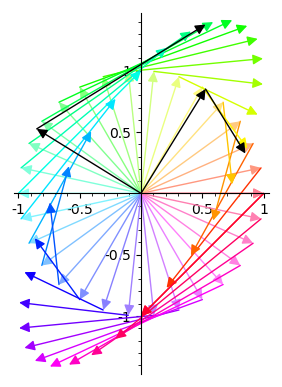

The eigenpicture generated by the matrix is 


[ 0  1]
[-1  0]

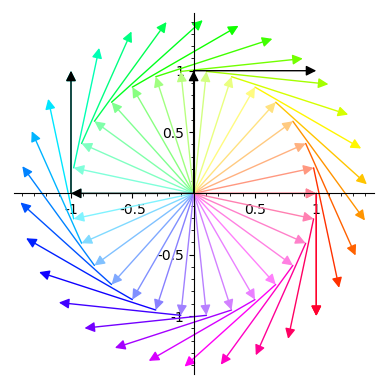

The eigenpicture generated by the matrix is 


[ 3 -2]
[ 4 -1]

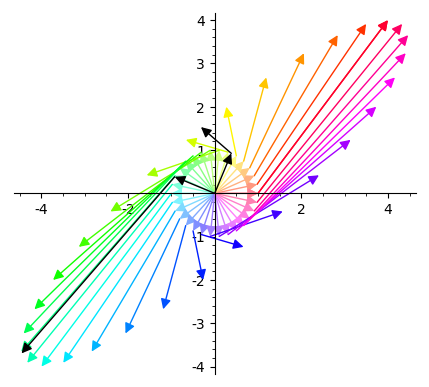

The eigenpicture generated by the matrix is 


[ 6 -1]
[ 2  3]

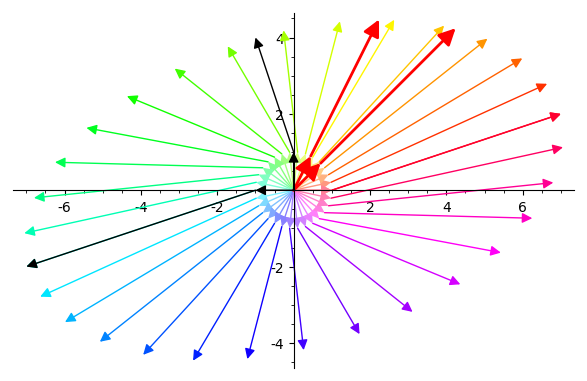

The eigenpicture generated by the matrix is 


[2 1]
[0 1]

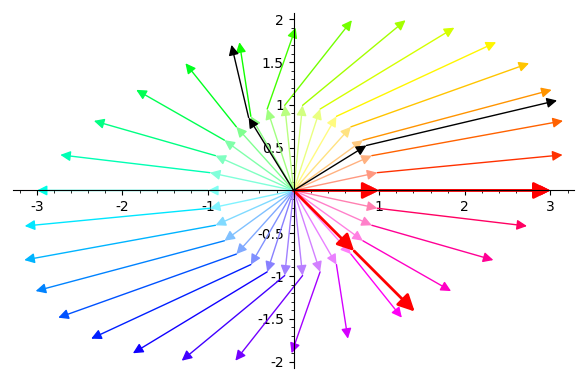

The eigenpicture generated by the matrix is 


[0 1]
[1 0]

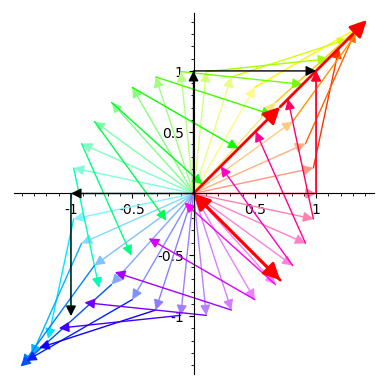

The eigenpicture generated by the matrix is 


[ 2 -2]
[-1  1]

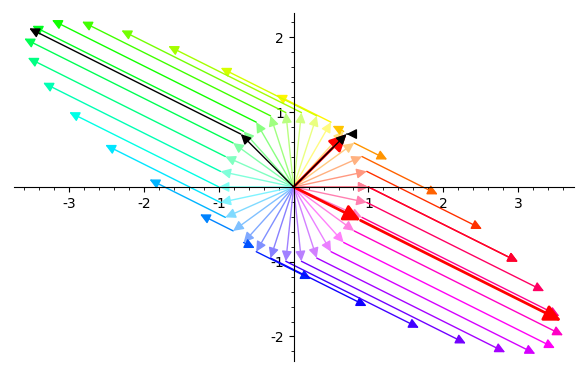

The eigenpicture generated by the matrix is 


[1 1]
[1 1]

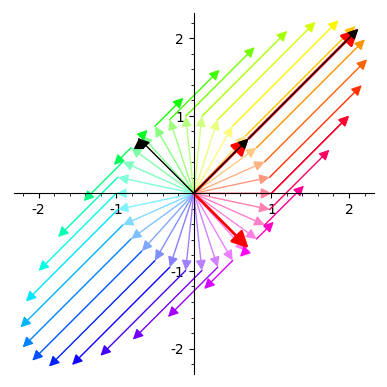

The eigenpicture generated by the matrix is 


[1 0]
[0 0]

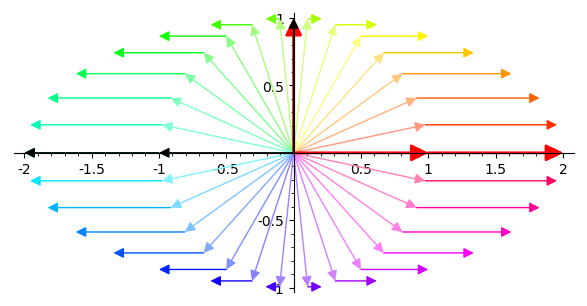

The eigenpicture generated by the matrix is 


[0 0]
[0 0]

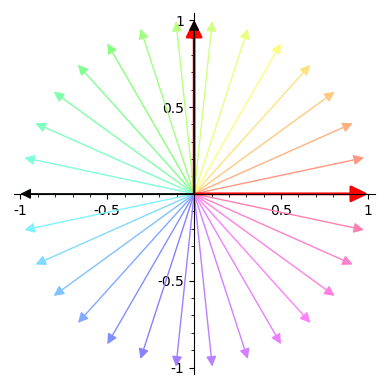

The eigenpicture generated by the matrix is 


[0 1]
[0 0]

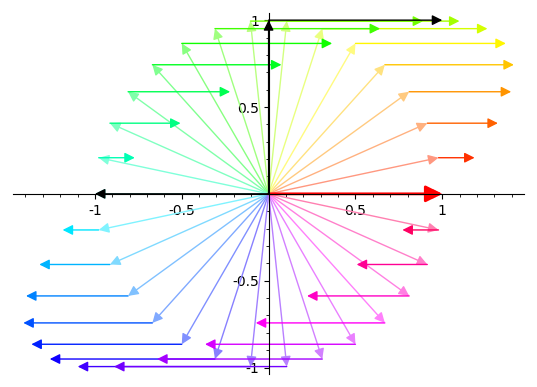

The eigenpicture generated by the matrix is 


[1 1]
[0 1]

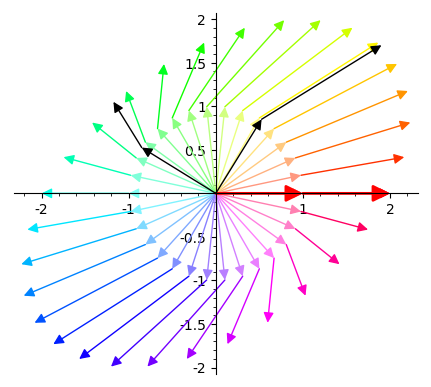

The eigenpicture generated by the matrix is 


[3 1]
[0 3]

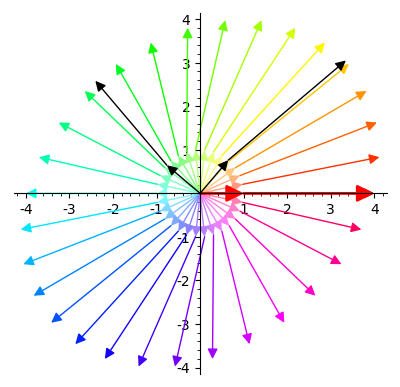

The eigenpicture generated by the matrix is 


[-2  1]
[-1  0]

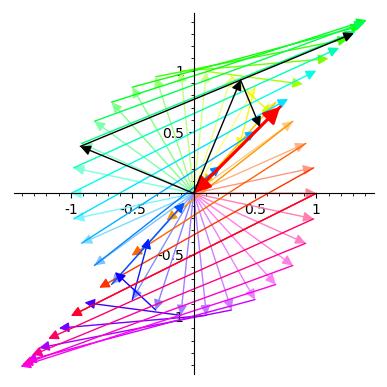

The eigenpicture generated by the matrix is 


[1 0]
[0 1]

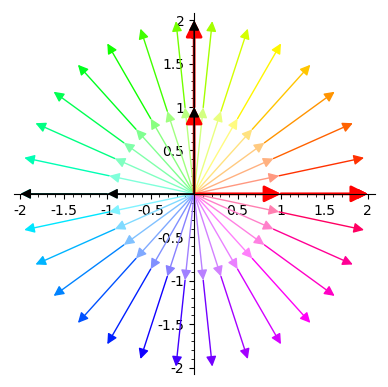

The eigenpicture generated by the matrix is 


[ 1  0]
[ 0 -1]

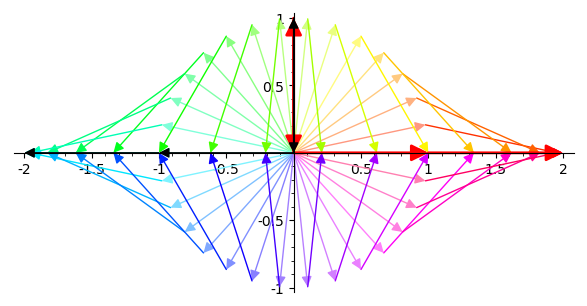

In [19]:
#COMPLEX EIGENVALUES (NEED TO BE IN CONJUGATE SO AS A RESULT ALL ARE INVERTIBLE AND DIAGONALIZABLE)
A1 = Matrix(ZZ, [[-1,1], [-1,0]]) # A matrix with no real eigenvalues
A2 = Matrix(ZZ, [[0,1], [-1,0]]) # A matrix which no real eigenvalues
A3 = Matrix(ZZ, [[3,-2], [4,-1]]) # A matrix which no real eigenvalues

#NOTE CANT HAVE ONE REAL AND ONE IMAGINARY EIGENVALUE BECAUSE OF CONJUGATION

#INVERTIBLE AND DIAGONALIZABLE
#2 REAL EIGENVALUES INVERTIBLE AND DIAGONALIZABLE
A4 = Matrix(ZZ, [[6,-1], [2,3]])
A5 = Matrix(ZZ, [[2,1],[0,1]])

#NOT ELLIPTICAL (INVERTIBLE AND DIAGONALIZABLE)
A6 = Matrix(ZZ, [[0,1], [1,0]])

#SINGULAR AND DIAGONALIZABLE
#ONE ZERO EIGENVAULE (ONE IS EQUAL TO 0) NOT INVERTIBLE DET = 0 ALL (SINGULAR)
A7 = Matrix(ZZ, [[2, -2], [-1,1]]) # A matrix which has large coefficients
A8 = Matrix(ZZ, [[1,1], [1,1]])  # A matrix with 0 determinant, but two real eigenvalues
A9 = Matrix(ZZ, [[1, 0], [0, 0]])
#SPECIAL CASE
A10 = Matrix(ZZ, [[0,0], [0,0]]) 

#SINGULAR AND NOT DIAGONALIZABLE
#NOT DIAGONALIZABLE AND NOT INVERTIBLE (SINGULAR)
A11 = Matrix(ZZ, [[0, 1], [0, 0]])

#INVERTIBLE AND NOT DIAGONALIZABLE
#NOT DIAGONALIZABLE (IF ONLY 1 RED ARROW) BUT INVERTIBLE - ONE DISTINCT EIGENVALUE
A12 = Matrix(ZZ, [[1, 1], [0, 1]]) # A matrix which has only one distinct eigenvector
A13 = Matrix(ZZ, [[3,1], [0,3]]) # A matrix which has only one distinct eigenvector
A14 = Matrix(ZZ, [[-2, 1], [-1, 0]]) # A matrix which has eigenvalues with multiplicty 2

#ORTHONORMAL MATRICIES
A15 = Matrix(ZZ, [[1,0], [0,1]])
A16 = Matrix(ZZ, [[1,0], [0,-1]])

Matrix_Array = [A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, A11, A12, A13, A14, A15, A16]
for i in range(len(Matrix_Array)):
    print("The eigenpicture generated by the matrix is ") 
    pretty_print(Matrix_Array[i])
    eigenpicture(Matrix_Array[i]).show()